# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [3]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [4]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [5]:
from datetime import datetime
from datetime import date, time
import glob

In [6]:
def treat_data(df,c):
    # Standardize data descriptions
    df=df.rename(columns = {'date':'Date'})
    df=df.rename(columns = {'variable':'Description'})
    df=df.rename(columns = {'Variable':'Description'})
    df=df.rename(columns={'Unnamed: 18':'Unnamed_18_'+c})
    df=df.replace(['New case/s (confirmed)','New cases of confirmed','new_confirmed'],'new cases')
    df=df.replace(['etc_new_deaths','Newly reported deaths','New deaths registered today (confirmed)',
                  'New deaths registered'],'new deaths')
    df=df.loc[df['Description'].isnull()==False]
    
    # Drop unwanted values
    df=df.dropna(how='all')
    df=df.replace(['-','Nr','NR'],np.nan)
    
    # transform dates to datetime
    df['Date'] = df['Date'].astype(str)
    df = df.loc[df['Date'].apply(lambda x: len(x)<=10)]
    df['Date'] = pd.to_datetime(df['Date'])
    
    # set desired indexes
    df = df.set_index(['Date','Description'])
    s = pd.Series([c], index=df.columns) #add an index for the country id
    df = df.transpose()
    df.set_index(s, append=True, inplace=True)
    df.index.names = ['Location','Country']
    
    return df

In [7]:
# Import Data
countries=pd.Series(['guinea_data','liberia_data','sl_data'],['Guinea','Liberia','Sierra Leone'])
name = 0
frame = pd.DataFrame()
list_ = []
d={}

for c in range(3):
    list_=[]
    print('Compute data extraction for '+countries.index[c])
    
    path=DATA_FOLDER+'/ebola/'+countries[c]
    allFiles = glob.glob(path + "/*.csv")
    
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, header=0)
        list_.append(df)
    frame=pd.concat(list_)
    frame=treat_data(frame,countries.index[c]) #import Data and keep country info
    name+=1
    d[c]=frame
    
# concat contries and display
dfs = [d[0], d[1], d[2]]
df = pd.concat(dfs,axis=1)
df = df.sort_index(level=1,axis=0)
df = df.swaplevel()
df.fillna('unknown')

Compute data extraction for Guinea
Compute data extraction for Liberia
Compute data extraction for Sierra Leone


Date                                            2014-08-31  \
Description                          New cases of suspects   
Country      Location                                        
Guinea       Beyla                                 unknown   
             Boffa                                 unknown   
             Conakry                                     1   
             Coyah                                 unknown   
             Dabola                                unknown   
             Dalaba                                unknown   
             Dinguiraye                            unknown   
             Dubreka                               unknown   
             Forecariah                            unknown   
             Gueckedou                                   2   
             Kerouane                              unknown   
             Kindia                                unknown   
             Kissidougou                           unknown   
             Kouroussa                             unknown   
             Lola                                  unknown   
             Macenta                                     6   
             Mzerekore                             unknown   
             Nzerekore                             unknown   
             Pita                                  unknown   
             Siguiri                               unknown   
             Telimele                              unknown   
             Totals                                      9   
             Yomou                                 unknown   
Liberia      Bomi County                           unknown   
             Bong County                           unknown   
             Gbarpolu County                       unknown   
             Grand Bassa                           unknown   
             Grand Cape Mount                      unknown   
             Grand Gedeh                           unknown   
             Grand Kru                             unknown   
...                                                    ...   
             Nimba County                          unknown   
             River Gee County                      unknown   
             RiverCess County                      unknown   
             Sinoe County                          unknown   
             Unnamed_18_Liberia                    unknown   
Sierra Leone 34 Military Hospital                  unknown   
             Bo                                    unknown   
             Bo EMC                                unknown   
             Bombali                               unknown   
             Bonthe                                unknown   
             Hastings-F/Town                       unknown   
             Kailahun                              unknown   
             Kambia                                unknown   
             Kenema                                unknown   
             Kenema (IFRC)                         unknown   
             Kenema (KGH)                          unknown   
             Koinadugu                             unknown   
             Kono                                  unknown   
             Moyamba                               unknown   
             National                              unknown   
             Police training School                unknown   
             Police traning School                 unknown   
             Port Loko                             unknown   
             Pujehun                               unknown   
             Tonkolili                             unknown   
             Unnamed_18_Sierra Leone               unknown   
             Western area                          unknown   
             Western area combined                 unknown   
             Western area rural                    unknown   
             Western area urban                    unknown   

Date                           

In [8]:
# Compute the daily average per month for each country of new cases and deaths

# Select data
df_average = df.loc[df.index.get_level_values('Location').isin(['Totals','National','national','totals','Total'])==False]
df_average = df_average.transpose()
df_average = df_average.loc[df_average.index.get_level_values('Description').isin(['new cases','new deaths'])]
df_average = df_average.astype(float)
df_average = df_average.transpose()
df_average = df_average.groupby(level=[0,1],axis=1).sum() # group by city

# Compute daily average
df_average = df_average.transpose() 
df_average = df_average.groupby(level=0,axis=1).sum() # group by date
df_average = df_average.groupby(by=(df_average.index.get_level_values('Date').month,df_average.index.get_level_values('Description'))).mean() #Average by month
df_average.columns.names = ['2014 Average new deaths and cases in:']
df_average.index.names = ['Month','Description']
df_average.fillna('unknown')

2014 Average new deaths and cases in:   Guinea  Liberia Sierra Leone
Month Description                                                   
6     new cases                        unknown  2.14286      unknown
      new deaths                       unknown  1.85714      unknown
7     new cases                        unknown  1.81818      unknown
      new deaths                       unknown  4.27273      unknown
8     new cases                           12.4  8.16667         19.6
      new deaths                           3.2  23.2222         5.55
9     new cases                        12.5625  6.16667      36.2759
      new deaths                           3.8  37.6087      4.66667
10    new cases                              6  1.47619      57.5357
      new deaths                            15    28.12      4.14286
11    new cases                        unknown      9.5      69.8947
      new deaths                       unknown  15.7692          1.5
12    new cases                        unknown  2173.88      54.3333
      new deaths                       unknown  unknown      unknown

## Task 1 Answer

First the data is loaded folder by folder. For each country the data format is standardized so that it is possible to join the three country after that. The names of columns and indexes are thus setted to Date, Description and Country, Location. Note that the index country is added to keep the information about the country and allow computation of mean after. Also standard name for new deaths and new cases is chosen so that "new" corresponds to the daily count of each. The date is set to datetime to render more easy next computations. Once each dataframe is standard, the three blocs are concatanated together to have all informations in one dataframe.
To compute the daily average, only new cases and new deaths are selected in a new dataframe. Then it is grouped by countries (sum over all cities) and then it is grouped by month (daily average).

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [9]:
"""
1. We need to load the first MID1.xls as DataFrame and use its name as indexes and the name of the document as column
2. Load the 8 next MID@I.xls and join them with the first DataFrame (some more line indexes will be added to the DataFrame too)
3. Load the metadata from the last file, and map the column name [MID1,MID2,...,MID9] to a MultiIndex: [(MID1,EC,NAN),(MID2,NEC1,tissue),...]
4. Change all the NaN created by the join operation to the tag 'unknown'
"""

"helper function to load one excel of the name MID@i"
def getMID(i):
    return pd.read_excel(DATA_FOLDER+"/microbiome/MID"+str(i)+".xls",index_col=0, sheetname='Sheet 1', header=None, names = ['MID'+str(i)])

"load all the MID.xls and join them together"
a = getMID(1)
for i in range(2,10):
    m = getMID(i)
    a = a.join(m, how='outer')
    
"split the full name of the bacterie into multiIndex (not needed since the full bacterie name is an unique index)"
#a.index = pd.MultiIndex.from_tuples([tuple(k.split(" ")) for k,v in a.iterrows()]) 

"load the metadata from metadata.xls"
metadata = pd.read_excel(DATA_FOLDER+"/microbiome/metadata.xls",index_col=0, sheetname='Sheet1')

"create a list of tuples from each line of the metadata"
columns = list(metadata.itertuples(index=True))

"change the column name to its real tuple name in a MultiIndex"
a.columns=pd.MultiIndex.from_tuples(columns)

"check the uniqueness of the indexes"
print("all indexes are uniques =",a.index.is_unique)

"remplace NaN to unknown"
a = a.fillna('unknown')

"print the dataFrame"
a

all indexes are uniques = True


,MID1,MID2,MID3,MID4,MID5,MID6,MID7,MID8,MID9
,EXTRACTION CONTROL,NEC 1,Control 1,NEC 2,Control 2,NEC 1,Control 1,NEC 2,Control 2
,NaN,tissue,tissue,tissue,tissue,stool,stool,stool,stool
0,,,,,,,,,
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",unknown,2,1,unknown,5,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",unknown,14,15,unknown,26,unknown,1,unknown,1
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7,23,14,2,28,7,8,unknown,16
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Stetteria",unknown,unknown,unknown,unknown,1,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Sulfophobococcus",unknown,1,4,unknown,5,1,2,unknown,2
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermodiscus",unknown,unknown,1,unknown,unknown,unknown,unknown,unknown,unknown
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Thermosphaera",unknown,2,1,unknown,2,unknown,1,unknown,unknown


## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [10]:
import re
from functools import reduce
from math import isnan
import numbers

from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

# FAQ - HW1 - https://docs.google.com/document/d/1P16ezd52JG5LjH7yd9GRoO6InYA5h3lWOlBkbxlKmuk/edit

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

## 0. Load and pre-process data.

For some more insight, the code is commented

In [11]:
# Load data
data_names = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
dataset = pd.read_excel(DATA_FOLDER+"/titanic.xls", index_col=None, names=data_names)


# Pre-process data

# Some cleaning before discussing the data, so that we can, for example, describe dataset['ticket'] as a number and not as a string 
# just because some rows hold 'PC343445' instead of '343445

# Category dictionnary for pclass, survived
cat_survived = {0 : "Died", 1:"Survived"}

# Treat Categorical data
# sex
dataset['sex'] = pd.Categorical(dataset['sex'])
cat_pclass = {1:"1st class", 2:"2nd class", 3:"3rd class"}
#pclass
dataset['pclass'] = dataset['pclass'].apply(lambda e : cat_pclass.get(e, 'Unknown'))
dataset['pclass'] = pd.Categorical(dataset['pclass'])
# survived
cat_survived = {0 : "Died", 1:"Survived"}
dataset['survived'] = dataset['survived'].apply(lambda e : cat_survived.get(e, 'Unknown'))
dataset['survived'] = pd.Categorical(dataset['survived'])
# embarked
map_embarked = {'C' : 'Cherbourg', 'Q':'Queensland', 'S':'Southampton'}
dataset['embarked'] = dataset['embarked'].apply(lambda e : map_embarked.get(e, 'Unknown'))
dataset['embarked'] = pd.Categorical(dataset['embarked'])


# In the 'ticket' colum, keep only the number and filter out characters (e.g "PC") in front of it
# This is done using regular expressions to match the digits
def process_ticket(s, verbose=False ) : 
    if type(s) is int : 
        return s
    elif type(s) is str and s.isdigit():
        return int(s)
    elif type(s) is str :
        res = re.search('\s\d\d', s)  # regex find first digit
        if res and s[res.start()+1:].isdigit() :
            return int(s[res.start()+1:])
        else :
            if verbose : print("tickets - NaN - erratic regex matched: ", s)
            return float('NaN')
    else : 
        if verbose :print("tickets - NaN - matched default case : ", s)
        return float('NaN')
dataset['ticket'] = dataset['ticket'].apply(process_ticket)


# Process cabins / floors
#
# We're only interested in the floor number (i.e. the first letter in the cabin number) later on. 
# For convenience, we will treat this data to retain only the floot number.
# To do so, we use regular expressions again.
#
# It happens often that there are several cabin numbers listed for a single passenger. In this case,
# we make sure all cabins are on the same floor.
#
# https://www.encyclopedia-titanica.org/cabins.html
# https://www.reference.com/education/many-floors-did-titanic-1ee686f0a1ffe96d
def process_cabin(s, verbose=False) : 
    """  Extracts the floor form the cabin numbers
         Then categorizes it"""
    floor='Unknown Deck'    
    if not type(s) is str :
        if verbose : print('cabins - empty string - didn\'t match string on : ', s)
        return floor
    res = re.findall('[A-Za-z][A-Za-z]*\d\d*', s) # match 1+ char followed by 1+ digit
    if len(res) > 1 :
        def reduce_floors(r1, r2) : 
            """ Checks that all listed cabin numbers for a passenger are on the same floor
                 and returns that floor"""
            floor1 = re.findall('[A-Za-z][A-Za-z]*', r1)[0] # match only the first 1+ chars
            floor2 = re.findall('[A-Za-z][A-Za-z]*', r2)[0]
            if floor1 == floor2 :
                return floor1
            else : 
                # this case never happens - checked with verbose=True
                if verbose : print('cabins - cabins aren\'t on the same floor : ', res)
                return floor
        floor = reduce(reduce_floors, res)
    elif len(res) > 0 :
        # there is necessarily exactly 1  match 
        floor = re.findall('[A-Za-z][A-Za-z]*', res[0])[0] 
    
    return { # switch statement equivalent
        'A' : 'Deck A',
        'B' : 'Deck B',
        'C' : 'Deck C',
        'D' : 'Deck D',
        'E' : 'Deck E',
        'F' : 'Deck F',
        'G' : 'Deck G',
        'T' : 'Boat Deck'
    }.get(floor, 'Unknown Deck')
#cat_cabin = {0 : 'Unknown Deck', 1 : 'Deck A', 2 : 'Deck B', 3 : 'Deck C', 4:'Deck D', 5:'Deck E', 6:'Deck F', 7:'Deck G', 8:'Boat Deck'}
dataset['cabin'] = pd.Categorical(dataset['cabin'].apply(process_cabin))


# Check the datatype of some columns (not really necessary)
def check_for_all(serie, predicate) :
    """ Predicate must be a function that maps the serie's elements to boolean
    """
    assert reduce(lambda x, y : x and y, serie.map(predicate))
    
check_for_all(dataset['sibsp'], (lambda e : isnan(e) or e%1==0))
check_for_all(dataset['parch'], (lambda e : isnan(e) or e%1==0))
check_for_all(dataset['fare'], (lambda e : isnan(e) or isinstance(e, numbers.Real)))
check_for_all(dataset['body'], (lambda e : isnan(e) or e%1==0))

#print(dataset)
dataset.describe()

,age,sibsp,parch,ticket,fare,body
count,1046.000000,1309.000000,1309.000000,1.301000e+03,1308.000000,121.000000
mean,29.881135,0.498854,0.385027,2.848119e+05,33.295479,160.809917
std,14.413500,1.041658,0.865560,6.369570e+05,51.758668,97.696922
min,0.166700,0.000000,0.000000,2.510000e+02,0.000000,1.000000
25%,21.000000,0.000000,0.000000,1.425800e+04,7.895800,72.000000
50%,28.000000,0.000000,0.000000,1.113200e+05,14.454200,155.000000
75%,39.000000,1.000000,0.000000,3.470770e+05,31.275000,256.000000
max,80.000000,8.000000,9.000000,3.101317e+06,512.329200,328.000000


## 1. Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical. ##

If 'Categorical' is not specified, please assume a non categorical attribute.  
For all categorical attributes, a category dictionnary has been created in the pre-processing step

__pclass__ :  
Description : The travelling class of a passenger : 1st, 2nd or 3rd class    
Type : Categorical -> stored as Integer    
Range : {1 - 3};   
 

__survived__ :   
Description : Wether or not the passenger survived the crash.   
Type : Categorical -> stored as integer   
Range : {0, 1}  
  
__name__ :  
Description : All name-related informations (name, surname, 2nd and 3rd name) and title (mr, ms, ...) of the passenger.    
Type : string  
Range :              --------------------------------  
  
__sex__ :   
Description : sex of the passenger (male or female)  
Type : Categorical -> stored as an integer  
Range : {0, 1}  
  
__age__ :   
Description : Age of the passenger.  
Type : float  
Range : [0.167, 80]  
  
__sibsp__ :       
Description : Number of siblings / spouses aboard the boat  
Type : integer  
Range : {0-8}  
  
__parch__ :     
Description : Number of parent / children aboard  
Type : integer  
Range : {0-9}  
  
__ticket__ :   
Description : Ticket number of the passenger  
Type : Integer (originally string)  
Range : {251 - 3101317}   
  
__fare__ : Float. number or ### - amount of money the passenger payed for its ticket    
Description : Amount of money payed for the ticket    
Type : float  
Range : [0, 512.3292]  
    
__cabin__ :   
Description : Cabin number a passenger - contains the floor (deck) number. Based on the informations we need, we kept only the floor number  
Type : Categorical -> integer (originally string)  
Range : {0 - 8}  - meaning {unknown, deck A, deck B, ... deck G, boat deck}
  
__embarked__ :   
Description : Port the passenger embarked from  
Type : Categorical -> Integer (originally, char)  
Range : {0 - 2}  
  
__boat__ :     
Description :       ----------------------------  
Type :       ----------------------------  
Range :       ----------------------------  
  
__body__ :   
Description : Uniquely identifies a recovered body  
Type : Integer  
Range : {1 - 328}  
  
__home.dest__ :    
Description : Home and destination of the passenger, separated by a /   
Type : String  
Range :      ----------------------------  



## Futher assumptions

1. It's fine to have floating point number as ages. We will treat it as "fraction of years", i.e a person that is 6.5 is 6 years and 6 months old  
2. Given the fact that we were only interested in the cabin floor, we took some liberty with the dataset['cabin'] and kept only the floor number  
3. We didn't touch dataset['boat'] not dataset['home.dest'] since we don't need them to answer any questions  
4. In the homework, We may represent missing data ('Unknown') on charts. I think it is useful to give meaning to the data, as we will not draw the same conclusions if we have 90% of missing data versus 10% of missing data. If missing data hinders visualization, I will remove it (cf questions 3)
  
    

## 2. Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.
  
  
  In most cases, we only need to select our data, use groupby() and agg('size') to count the number of passengers matching each case  
     
     
  In the 'age' case, we create a range of decades ( i.e [10, 20, ... 80, 90]). Then, for each decade : 
     -  we create an index that matches only the passengers with year within this decade
     - apply this index to the dataset and evaluate its length
  Then store everthing in a Series and plot the results
  
   


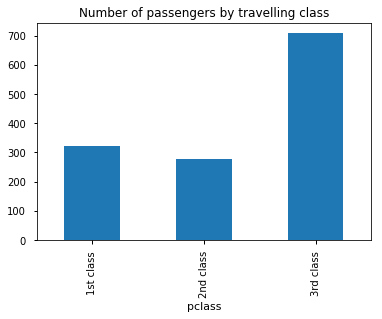

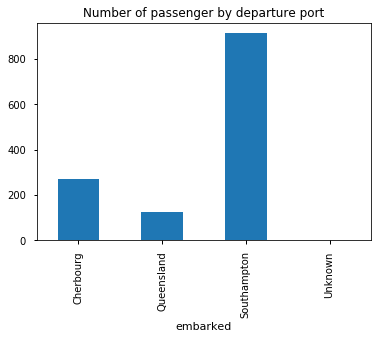

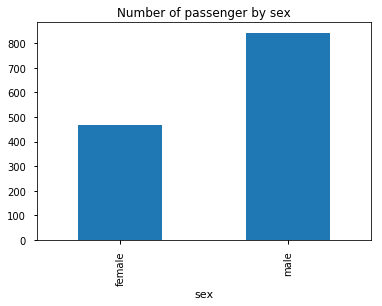

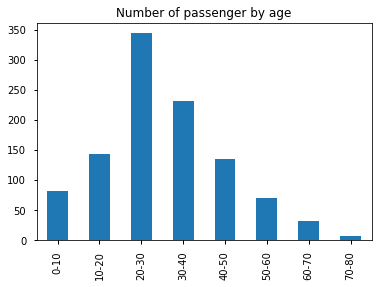

In [12]:
## Passengers' travel class histogram
fig_pclass = plt.figure()
pclass_data = dataset[['pclass']].copy()
pclass_count = pclass_data.groupby(['pclass']).agg('size')
pclass_count.plot(kind='bar', title='Number of passengers by travelling class')


## Passengers' embarkation port
fig_embark = plt.figure()
embarked_data = dataset[['embarked']].copy()
embarked_count = embarked_data.groupby(['embarked']).agg('size')
embarked_count.plot(kind='bar', title='Number of passenger by departure port')


## Passengers' sex
fig_sex = plt.figure()
sex_data = dataset[['sex']].copy()
sex_count = sex_data.groupby(['sex']).agg('size')
sex_count.plot(kind='bar', title='Number of passenger by sex')


## Passenger's age
fig_age = plt.figure()
age_data = dataset['age']
decades = np.arange(10, 90, 10)
# for each decade, map to boolean values with 'e -> return e in [decade-10, decade[', then use the result as an index to splice age_data
decades_count = pd.Series([ len(age_data[age_data.map(lambda e : e < decade and e >= decade -10)]) for decade in decades])
decades_count.index = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
# for verification :
#dec = 20
#print(dec, "- -> ", len(age_data[age_data.map(lambda e : e < dec and e >= dec -10)]))
#print(decades_data)
#print( decades_data.sum())
decades_count.plot(kind='bar', title='Number of passenger by age')

plt.show()

## 3. Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.



We use the same technique as in the previous subquestion, and then we must divide it by the total number of passengers to obtain a proportion.

It is interresting here to keep the passenger with unknown cabin deck : while it hinders the visibility of the data, it helps us realize that the conclusions we can make using the second graphs aer made using only a small subset of data

In [29]:
floors_data = dataset['cabin']
floors_count = pd.Series([len(floors_data[floors_data.values == floor]) for floor in dataset['cabin'].cat.categories])
floors_count.index = dataset['cabin'].cat.categories

# for verifications
#print(cat_cabin)
#print(floors_count, "\n sum : ", sum(floors_count))
#floor = 3
#print(cat_cabin[floor], " : ", len(floors_data[floors_data.values == floor]))

floors_prop = floors_count / floors_count.sum()
#print("floor proportions \n", floors_prop, " sum should be 1 : ", floors_prop.sum())
floors_prop_no_unknown = (floors_count / floors_count[:data_length-1].sum())[:data_length-1]
#print("floor proportions no onknown\n", floors_prop_no_unknown, " sum should be 1 : ", floors_prop.sum())
colors = ['green', 'orange', 'brown', 'yellow', 'red', 'cyan', 'purple', 'pink']

fig = plt.figure()
floors_prop.plot(kind='pie', title='Number of passenger by by deck', colors=colors)

fig_no_unknown = plt.figure()
floors_prop_no_unknown.plot(kind='pie', title='Number of passenger by by deck (without passengers on unknown deck)', colors=colors[1:])

plt.show()

floors_count['Deck A']
(dataset['cabin'].cat.categories).drop('Unknown Deck')


Index(['Deck A', 'Deck B', 'Deck C', 'Deck D', 'Deck E', 'Deck F', 'Deck G'], dtype='object')

## 4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

We use mostly the same technique as previously

In [ ]:
ps_data = dataset[['pclass', 'survived']].copy()

# calculate percentage of survivors
survivors_count = ps_data[ps_data['survived']=='Survived'].groupby(['pclass']).agg('size')
passengers_count = ps_data.groupby(['pclass']).agg('size')

survivors_proportion = (survivors_count / passengers_count)
survivors_proportion.name = 'Percentage of survivors'

for pclass in survivors_proportion.index.categories :
    fig = plt.figure()
    title = 'Percentage of survivors in ' + pclass
    pd.Series( [survivors_proportion[pclass], 1-survivors_proportion[pclass]],
                      index=['Survived','Died']
             ).plot(kind='pie', title=title)
    
plt.show()    

## 5. Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

Here, we use the same technique as before. However, we groupby several indices, and obtain the result as a dataframe that has as index the two categories ('pclass', 'index') we used to groupby.

In [ ]:
ds = (dataset.copy())[['pclass', 'sex', 'survived']]

survivors_serie = ds[ds['survived']=='Survived']
survivors_count = survivors_serie.groupby(['pclass', 'sex']).agg('size')

passengers_count = ds.groupby(['pclass', 'sex']).agg('size')

survivors_proportion = survivors_count / passengers_count
survivors_proportion.name = 'survivors proportion'
res = pd.DataFrame(survivors_proportion)

res.plot(kind='bar', title='Proportion of survivors by travelling class and sex')
plt.show()

## 6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

Here, the code's comments will give more insight at each step

In [ ]:
subset = dataset[['pclass', 'sex', 'age', 'survived']].copy()

# We use quantile to get a feel for the data. 
# Comparing [18-21] and [39-45] would be interresting, as these are relatively compact age groups
# representing the beggining and the middle of the adult age.

# filter by age and make sure we've got equally sized age categories
cat_age = {0 : "18-21", 1:"39-45"}
subset = subset[subset.age.apply(lambda age : (age>=18 and age<=21) or (age>=39 and age<=45))]
sample_size = min(len(subset[subset.age.apply(lambda age : (age>=18 and age<=21))]), len(subset[subset.age.apply(lambda age : (age>=39 and age<=45))]))

# setup nice names for the index
subset['age'] = subset['age'].apply(lambda age : "18-21 Y.O." if age<=21 else "39-45 Y.O.")

#  Equally sized categories
subset = subset[subset['age']=="18-21 Y.O."].head(sample_size).append(subset[subset['age']=="39-45 Y.O."].head(sample_size))


## Process data 

# keep survivors only and count them, per ('age', 'pclass', 'sex')
survivors_serie = subset[subset['survived']=='Survived']
survivors_count = survivors_serie.groupby(['age', 'pclass', 'sex']).agg('size')

# count the total number of passenger in the same fashion, and divide to obtain proportion of survivors
passengers_count = subset.groupby(['age', 'pclass', 'sex']).agg('size')
survivors_prop = survivors_count / passengers_count
survivors_prop.name = 'Proportion of survivors'

# display result
res = pd.DataFrame(survivors_prop)
res

res